In [ ]:
file_path = './utk_face_cropped_Sample_01.csv' # ..._Sample_01.csv to ..._Sample_10.csv

# Top Left: images_sub_reshape[:,:,0:20,0:20] = 0
# Eyes: images_sub_reshape[:,:,30:100,20:200] = 0
# Mouth: images_sub_reshape[:,:,130:210,20:200] = 0
# Nose: images_sub_reshape[:,:,100:140,85:140] = 0
# Face: images_sub_reshape[:,:,:200,:] = 0

hight_1, hight_2, width_1, width_2 = 130, 210, 20, 200 # For Mouth

In [ ]:
import torch
import numpy as np
import random
import os

def setup_seed(seed):
     torch.manual_seed(seed)
     torch.cuda.manual_seed_all(seed)
     np.random.seed(seed)
     random.seed(seed)
     torch.backends.cudnn.deterministic = True

In [ ]:
# From https://www.kaggle.com/datasets/abhikjha/utk-face-cropped/data
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

import kagglehub

# Download latest version
path = kagglehub.dataset_download("abhikjha/utk-face-cropped")

print("Path to dataset files:", path)

import os
from PIL import Image
import numpy as np
import cv2

def get_train_test_df(df):
    train_df = df.loc[df['Type'] == 'Train']
    images_path = '/root/.cache/kagglehub/datasets/abhikjha/utk-face-cropped/versions/1/utkcropped'

    # Initialize lists to store images and ages
    images_train = []
    ages_train = []

    for i in range(len(train_df)):
        file_name = train_df.iloc[i]['File']
        age = train_df.iloc[i]['Age']
        # Construct the image path
        image_path = os.path.join(images_path, file_name)

        # Load the image
        image = Image.open(image_path).convert('RGB')
        image = np.array(image)  # Convert PIL Image to NumPy array
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = np.stack((image,)*3, axis=-1)
        images_train.append(image)
        ages_train.append(age)

    # Resize all images to a common size (e.g., 224x224 pixels)
    common_size = (224, 224)
    resized_images_train = [cv2.resize(image, common_size) for image in images_train]

    # Convert the resized images list into a numpy array
    images_train_array = np.array(resized_images_train)
    ages_train_array = np.array(ages_train)

    # Print the shape of the resulting numpy array
    print(f"Shape of the images train array: {images_train_array.shape}")
    print(f"Shape of the ages train array: {ages_train_array.shape}")

    test_df = df.loc[df['Type'] == 'Test']
    # Initialize lists to store images and ages
    images_test = []
    ages_test = []

    for i in range(len(test_df)):
        file_name = test_df.iloc[i]['File']
        age = test_df.iloc[i]['Age']
        # Construct the image path
        image_path = os.path.join(images_path, file_name)

        # Load the image
        image = Image.open(image_path).convert('RGB')
        image = np.array(image)  # Convert PIL Image to NumPy array
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = np.stack((image,)*3, axis=-1)
        images_test.append(image)
        ages_test.append(age)

    # Resize all images to a common size (e.g., 224x224 pixels)
    resized_images_test = [cv2.resize(image, common_size) for image in images_test]

    # Convert the resized images list into a numpy array
    images_test_array = np.array(resized_images_test)
    ages_test_array = np.array(ages_test)

    # Print the shape of the resulting numpy array
    print(f"Shape of the images test array: {images_test_array.shape}")
    print(f"Shape of the ages test array: {ages_test_array.shape}")

    return images_train_array, ages_train_array, images_test_array, ages_test_array




   Age                                   File   Type
0   20  20_1_4_20170117193608005.jpg.chip.jpg  Train
1   20  20_1_3_20170104231832057.jpg.chip.jpg  Train
2   20  20_0_1_20170113132537718.jpg.chip.jpg  Train
3   20  20_1_4_20170103223117967.jpg.chip.jpg  Train
4   20  20_1_0_20170105183449767.jpg.chip.jpg  Train


100%|██████████| 232M/232M [00:01<00:00, 222MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/abhikjha/utk-face-cropped/versions/1


Shape of the images train array: (1000, 224, 224, 3)
Shape of the ages train array: (1000,)
Shape of the images test array: (1000, 224, 224, 3)
Shape of the ages test array: (1000,)
Shape of the images_sub_reshape array: (1000, 3, 224, 224)
Shape of the images_test_array array: (1000, 3, 224, 224)


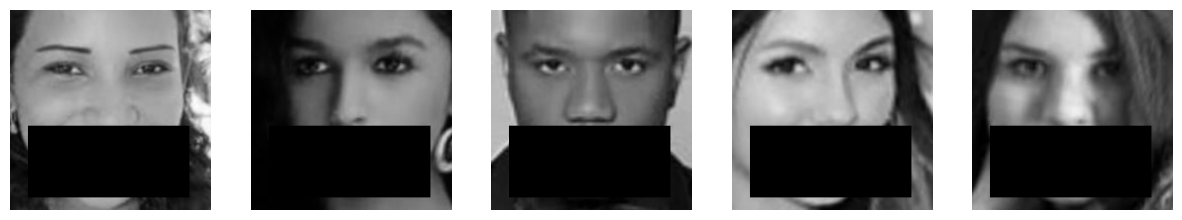

In [ ]:
images_train_array, ages_train_array, images_test_array, ages_test_array = get_train_test_df(df)

# ages_sub = np.concatenate((ages_train_array, ages_test_array), axis=0)
# images_sub = np.concatenate((images_train_array, images_test_array), axis=0)/ 255

# Print the shape of the resulting numpy array
# print(f"Shape of the images array: {images_sub.shape}")
# print(f"Shape of the ages array: {ages_sub.shape}")

images_train_array, images_test_array = images_train_array / 255, images_test_array / 255

images_train_array = np.transpose(np.transpose(images_train_array, (0, 3, 2, 1)), (0, 1, 3, 2))
images_test_array = np.transpose(np.transpose(images_test_array, (0, 3, 2, 1)), (0, 1, 3, 2))
print(f"Shape of the images_sub_reshape array: {images_train_array.shape}")
print(f"Shape of the images_test_array array: {images_test_array.shape}")

images_train_array[:,:,hight_1:hight_2,width_1:width_2] = 0
images_test_array[:,:,hight_1:hight_2,width_1:width_2] = 0

import matplotlib.pyplot as plt
import numpy as np

# Assuming 'image_array' is your NumPy array with shape (3, 224, 224)
# Create a figure with 5 subplots in a row
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i, ax in enumerate(axes):
    # Transpose the array to (224, 224, 3) for displaying
    image = np.transpose(images_train_array[i], (1, 2, 0))
    ax.imshow(image)
    ax.axis('off')  # Hide the axis

plt.show()

In [ ]:

image_train_tensor = torch.tensor(images_train_array, dtype=torch.float32)
image_test_tensor = torch.tensor(images_test_array, dtype=torch.float32)
age_train_tensor = torch.tensor(ages_train_array, dtype=torch.float32)
age_test_tensor = torch.tensor(ages_test_array, dtype=torch.float32)

print(image_train_tensor.shape)  # Should print torch.Size([8212, 3, 224, 224])
print(image_test_tensor.shape)   # Should print torch.Size([8213, 3, 224, 224])
print(age_train_tensor.shape)    # Should print torch.Size([8212])
print(age_test_tensor.shape)     # Should print torch.Size([8213])

torch.Size([1000, 3, 224, 224])
torch.Size([1000, 3, 224, 224])
torch.Size([1000])
torch.Size([1000])


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as Data
import numpy as np
from tqdm import tqdm
import torchvision.models as models
from torch.optim.lr_scheduler import ReduceLROnPlateau
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def setup_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    torch.backends.cudnn.deterministic = True

def get_y_model(image_train_tensor, image_test_tensor, age_train_tensor, age_test_tensor):

    batch_size = 128

    train_data = Data.TensorDataset(image_train_tensor.to(device), age_train_tensor.to(device))
    train_loader = Data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

    test_data = Data.TensorDataset(image_test_tensor.to(device), age_test_tensor.to(device))
    test_loader = Data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

    setup_seed(42)

    # Load pre-trained EfficientNet B0 model using the 'weights' parameter
    model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1)
    # Modify the final layer to output a single value

    num_ftrs = model.classifier[1].in_features
    model.classifier[1] = nn.Linear(num_ftrs, 1)
    # Move the model to the device after modifying the final layer
    model.to(device)

    # criterion = nn.MSELoss()
    # Use nn.L1Loss for MAE
    criterion = nn.L1Loss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

    # Define the learning rate scheduler
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.2, patience=10, min_lr=1e-6)

    # Early stopping parameters
    early_stopping_patience = 25
    best_val_loss = float('inf')
    patience_counter = 0

    # Lists to store loss values for plotting
    train_losses = []
    val_losses = []

    # Training loop
    num_epochs = 300

    model.eval()  # Set the model back to training mode
    running_loss = 0.0
    with torch.no_grad():
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1))
            running_loss += loss.item()

    # Calculate average training loss
    avg_train_loss = running_loss / len(train_loader)

    # Validation phase
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1))
            val_loss += loss.item()
    avg_val_loss = val_loss / len(test_loader)

    current_lr = scheduler.optimizer.param_groups[0]['lr']
    print(f'Epoch [{0}/{num_epochs}], Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}, Learning Rate: {current_lr:.6f}')

    # Save the best model initially
    torch.save(model.state_dict(), 'best_model.pth')

    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)

    model.train()
    setup_seed(42)
    for epoch in tqdm(range(num_epochs)):
        model.train()  # Set the model back to training mode
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1))
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Calculate average training loss
        avg_train_loss = running_loss / len(train_loader)

        # Validation phase
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels.unsqueeze(1))
                val_loss += loss.item()
        avg_val_loss = val_loss / len(test_loader)

        # Step the scheduler based on the Validation loss
        scheduler.step(avg_val_loss)

        # Check for early stopping and save the best model based on validation loss
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            patience_counter = 0
            torch.save(model.state_dict(), 'best_model.pth')
        else:
            patience_counter += 1

        if patience_counter >= early_stopping_patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

        # Append losses for plotting
        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)

        # Plotting the training and validation losses without showing the plot
        plt.figure(figsize=(10, 5))
        plt.plot(train_losses, label='Training Loss')
        plt.plot(val_losses, label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss vs Epochs')
        plt.legend()
        plt.savefig('loss_vs_epoch.png')
        plt.close()  # Close the figure

        # Print the loss and learning rate every 5 epochs
        if (epoch + 1) % 5 == 0:
            current_lr = scheduler.optimizer.param_groups[0]['lr']
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}, Learning Rate: {current_lr:.6f}')

    # Load the best model after training is complete
    model.load_state_dict(torch.load('best_model.pth'))
    print("Best model loaded with validation loss:", best_val_loss)

    import os

    file_path = './best_model.pth'

    # Check if the file exists before deleting
    if os.path.exists(file_path):
        os.remove(file_path)
        print(f"{file_path} has been deleted.")
    else:
        print(f"{file_path} does not exist.")

    return model


In [ ]:
model_y_k1 = get_y_model(image_train_tensor=image_train_tensor, image_test_tensor=image_test_tensor, age_train_tensor=age_train_tensor, age_test_tensor=age_test_tensor)

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 93.7MB/s]


Epoch [0/300], Loss: 39.5062, Validation Loss: 39.5962, Learning Rate: 0.001000


  2%|▏         | 5/300 [00:07<06:56,  1.41s/it]

Epoch [5/300], Loss: 16.6727, Validation Loss: 9.1742, Learning Rate: 0.001000


  3%|▎         | 10/300 [00:14<06:26,  1.33s/it]

Epoch [10/300], Loss: 5.1715, Validation Loss: 7.4398, Learning Rate: 0.001000


  5%|▌         | 15/300 [00:20<06:20,  1.34s/it]

Epoch [15/300], Loss: 3.2569, Validation Loss: 6.7376, Learning Rate: 0.001000


  7%|▋         | 20/300 [00:27<06:06,  1.31s/it]

Epoch [20/300], Loss: 2.3618, Validation Loss: 6.6261, Learning Rate: 0.001000


  8%|▊         | 25/300 [00:33<05:53,  1.29s/it]

Epoch [25/300], Loss: 2.1059, Validation Loss: 6.8762, Learning Rate: 0.001000


 10%|█         | 30/300 [00:40<05:46,  1.28s/it]

Epoch [30/300], Loss: 1.9218, Validation Loss: 7.0785, Learning Rate: 0.000200


 12%|█▏        | 35/300 [00:46<05:42,  1.29s/it]

Epoch [35/300], Loss: 1.2428, Validation Loss: 6.5773, Learning Rate: 0.000200


 13%|█▎        | 40/300 [00:53<05:39,  1.30s/it]

Epoch [40/300], Loss: 1.1241, Validation Loss: 6.5500, Learning Rate: 0.000200


 15%|█▌        | 45/300 [00:59<05:30,  1.30s/it]

Epoch [45/300], Loss: 1.0314, Validation Loss: 6.5174, Learning Rate: 0.000040


 17%|█▋        | 50/300 [01:06<05:21,  1.28s/it]

Epoch [50/300], Loss: 1.0968, Validation Loss: 6.5249, Learning Rate: 0.000040


 18%|█▊        | 55/300 [01:12<05:14,  1.28s/it]

Epoch [55/300], Loss: 1.0726, Validation Loss: 6.5438, Learning Rate: 0.000008


 20%|██        | 60/300 [01:19<05:08,  1.28s/it]

Epoch [60/300], Loss: 0.9906, Validation Loss: 6.5405, Learning Rate: 0.000008


 22%|██▏       | 65/300 [01:25<05:21,  1.37s/it]

Epoch [65/300], Loss: 1.1291, Validation Loss: 6.5265, Learning Rate: 0.000008


 23%|██▎       | 70/300 [01:32<05:01,  1.31s/it]

Epoch [70/300], Loss: 0.8887, Validation Loss: 6.5198, Learning Rate: 0.000008


 25%|██▌       | 75/300 [01:38<04:51,  1.29s/it]

Epoch [75/300], Loss: 0.9323, Validation Loss: 6.5246, Learning Rate: 0.000008


 27%|██▋       | 80/300 [01:45<04:44,  1.29s/it]

Epoch [80/300], Loss: 0.9388, Validation Loss: 6.5286, Learning Rate: 0.000002


 28%|██▊       | 85/300 [01:51<04:36,  1.29s/it]

Epoch [85/300], Loss: 1.0250, Validation Loss: 6.5292, Learning Rate: 0.000002


 30%|███       | 90/300 [01:58<04:30,  1.29s/it]

Epoch [90/300], Loss: 1.0437, Validation Loss: 6.5262, Learning Rate: 0.000002


 32%|███▏      | 95/300 [02:04<04:23,  1.29s/it]

Epoch [95/300], Loss: 0.9058, Validation Loss: 6.5160, Learning Rate: 0.000002


 33%|███▎      | 100/300 [02:11<04:16,  1.28s/it]

Epoch [100/300], Loss: 1.1923, Validation Loss: 6.5461, Learning Rate: 0.000001


 35%|███▌      | 105/300 [02:17<04:16,  1.31s/it]

Epoch [105/300], Loss: 1.0949, Validation Loss: 6.5485, Learning Rate: 0.000001


 37%|███▋      | 110/300 [02:24<04:04,  1.29s/it]

Epoch [110/300], Loss: 0.9424, Validation Loss: 6.5215, Learning Rate: 0.000001


 37%|███▋      | 110/300 [02:25<04:10,  1.32s/it]

Early stopping at epoch 111
Best model loaded with validation loss: 6.507801353931427
./best_model.pth has been deleted.



<ipython-input-6-7e173775a6d7>:156: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


In [ ]:
model_y_k2 = get_y_model(image_train_tensor=image_test_tensor, image_test_tensor=image_train_tensor, age_train_tensor=age_test_tensor, age_test_tensor=age_train_tensor)

Epoch [0/300], Loss: 39.5123, Validation Loss: 39.5904, Learning Rate: 0.001000


  2%|▏         | 5/300 [00:06<06:22,  1.30s/it]

Epoch [5/300], Loss: 18.2672, Validation Loss: 31.4223, Learning Rate: 0.001000


  3%|▎         | 10/300 [00:13<06:20,  1.31s/it]

Epoch [10/300], Loss: 5.6477, Validation Loss: 6.5985, Learning Rate: 0.001000


  5%|▌         | 15/300 [00:19<06:07,  1.29s/it]

Epoch [15/300], Loss: 3.5356, Validation Loss: 6.8037, Learning Rate: 0.001000


  7%|▋         | 20/300 [00:26<06:03,  1.30s/it]

Epoch [20/300], Loss: 2.6722, Validation Loss: 6.9759, Learning Rate: 0.001000


  8%|▊         | 25/300 [00:32<05:57,  1.30s/it]

Epoch [25/300], Loss: 2.1402, Validation Loss: 6.4236, Learning Rate: 0.001000


 10%|█         | 30/300 [00:38<05:47,  1.29s/it]

Epoch [30/300], Loss: 2.1312, Validation Loss: 6.5154, Learning Rate: 0.001000


 12%|█▏        | 35/300 [00:45<06:25,  1.46s/it]

Epoch [35/300], Loss: 1.9038, Validation Loss: 6.4013, Learning Rate: 0.001000


 13%|█▎        | 40/300 [00:52<05:43,  1.32s/it]

Epoch [40/300], Loss: 1.7118, Validation Loss: 6.4964, Learning Rate: 0.001000


 15%|█▌        | 45/300 [00:58<05:35,  1.31s/it]

Epoch [45/300], Loss: 1.5574, Validation Loss: 6.3395, Learning Rate: 0.001000


 17%|█▋        | 50/300 [01:05<05:22,  1.29s/it]

Epoch [50/300], Loss: 1.5717, Validation Loss: 6.6173, Learning Rate: 0.001000


 18%|█▊        | 55/300 [01:11<05:15,  1.29s/it]

Epoch [55/300], Loss: 1.5564, Validation Loss: 6.3588, Learning Rate: 0.001000


 20%|██        | 60/300 [01:18<05:13,  1.31s/it]

Epoch [60/300], Loss: 1.1433, Validation Loss: 6.3193, Learning Rate: 0.000200


 22%|██▏       | 65/300 [01:25<05:19,  1.36s/it]

Epoch [65/300], Loss: 1.0959, Validation Loss: 6.3598, Learning Rate: 0.000200


 23%|██▎       | 70/300 [01:31<04:59,  1.30s/it]

Epoch [70/300], Loss: 0.8912, Validation Loss: 6.3465, Learning Rate: 0.000040


 25%|██▌       | 75/300 [01:37<04:50,  1.29s/it]

Epoch [75/300], Loss: 0.8478, Validation Loss: 6.3542, Learning Rate: 0.000040


 27%|██▋       | 80/300 [01:44<04:43,  1.29s/it]

Epoch [80/300], Loss: 0.8463, Validation Loss: 6.3598, Learning Rate: 0.000008


 27%|██▋       | 82/300 [01:48<04:47,  1.32s/it]

Early stopping at epoch 83
Best model loaded with validation loss: 6.287256896495819
./best_model.pth has been deleted.



<ipython-input-6-7e173775a6d7>:156: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


In [ ]:
import torch
import numpy as np
import random
import os

def setup_seed(seed):
     torch.manual_seed(seed)
     torch.cuda.manual_seed_all(seed)
     np.random.seed(seed)
     random.seed(seed)
     torch.backends.cudnn.deterministic = True

# From https://www.kaggle.com/datasets/abhikjha/utk-face-cropped/data
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

import kagglehub

# Download latest version
path = kagglehub.dataset_download("abhikjha/utk-face-cropped")

print("Path to dataset files:", path)

import os
from PIL import Image
import numpy as np
import cv2

def get_train_test_df(df):
    train_df = df.loc[df['Type'] == 'Train']
    images_path = '/root/.cache/kagglehub/datasets/abhikjha/utk-face-cropped/versions/1/utkcropped'

    # Initialize lists to store images and ages
    images_train = []
    ages_train = []

    for i in range(len(train_df)):
        file_name = train_df.iloc[i]['File']
        age = train_df.iloc[i]['Age']
        # Construct the image path
        image_path = os.path.join(images_path, file_name)

        # Load the image
        image = Image.open(image_path).convert('RGB')
        image = np.array(image)  # Convert PIL Image to NumPy array
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # image = np.stack((image,)*3, axis=-1)
        images_train.append(image)
        ages_train.append(age)

    # Resize all images to a common size (e.g., 224x224 pixels)
    common_size = (224, 224)
    resized_images_train = [cv2.resize(image, common_size) for image in images_train]

    # Convert the resized images list into a numpy array
    images_train_array = np.array(resized_images_train)
    ages_train_array = np.array(ages_train)
    images_train_array = images_train_array.reshape(1000, 224, 224, 1)

    # Print the shape of the resulting numpy array
    print(f"Shape of the images train array: {images_train_array.shape}")
    print(f"Shape of the ages train array: {ages_train_array.shape}")

    test_df = df.loc[df['Type'] == 'Test']
    # Initialize lists to store images and ages
    images_test = []
    ages_test = []

    for i in range(len(test_df)):
        file_name = test_df.iloc[i]['File']
        age = test_df.iloc[i]['Age']
        # Construct the image path
        image_path = os.path.join(images_path, file_name)

        # Load the image
        image = Image.open(image_path).convert('RGB')
        image = np.array(image)  # Convert PIL Image to NumPy array
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # image = np.stack((image,)*3, axis=-1)
        images_test.append(image)
        ages_test.append(age)

    # Resize all images to a common size (e.g., 224x224 pixels)
    resized_images_test = [cv2.resize(image, common_size) for image in images_test]

    # Convert the resized images list into a numpy array
    images_test_array = np.array(resized_images_test)
    ages_test_array = np.array(ages_test)
    images_test_array = images_test_array.reshape(1000, 224, 224, 1)

    # Print the shape of the resulting numpy array
    print(f"Shape of the images test array: {images_test_array.shape}")
    print(f"Shape of the ages test array: {ages_test_array.shape}")

    return images_train_array, ages_train_array, images_test_array, ages_test_array




   Age                                   File   Type
0   20  20_1_4_20170117193608005.jpg.chip.jpg  Train
1   20  20_1_3_20170104231832057.jpg.chip.jpg  Train
2   20  20_0_1_20170113132537718.jpg.chip.jpg  Train
3   20  20_1_4_20170103223117967.jpg.chip.jpg  Train
4   20  20_1_0_20170105183449767.jpg.chip.jpg  Train
Path to dataset files: /root/.cache/kagglehub/datasets/abhikjha/utk-face-cropped/versions/1


Shape of the images train array: (1000, 224, 224, 1)
Shape of the ages train array: (1000,)
Shape of the images test array: (1000, 224, 224, 1)
Shape of the ages test array: (1000,)
Shape of the images_train_array array: (1000, 1, 224, 224)
Shape of the images_test_array array: (1000, 1, 224, 224)


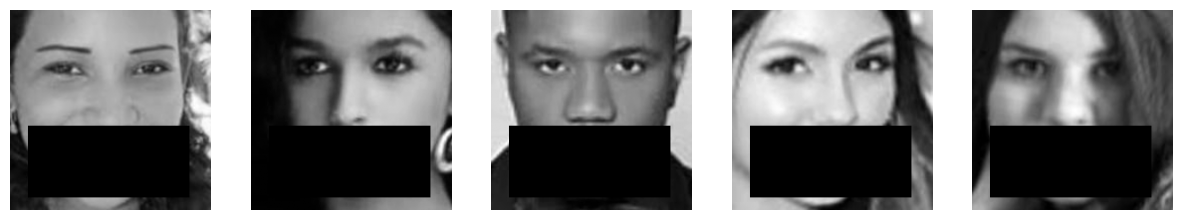

In [ ]:
images_train_array, ages_train_array, images_test_array, ages_test_array = get_train_test_df(df)

images_train_array, images_test_array = (images_train_array/255), (images_test_array/255)


images_train_array = np.transpose(np.transpose(images_train_array, (0, 3, 2, 1)), (0, 1, 3, 2))
images_test_array = np.transpose(np.transpose(images_test_array, (0, 3, 2, 1)), (0, 1, 3, 2))

print(f"Shape of the images_train_array array: {images_train_array.shape}")
print(f"Shape of the images_test_array array: {images_test_array.shape}")

images_train_array_covered = images_train_array.copy()
images_test_array_covered = images_test_array.copy()

images_train_array_covered[:,:,hight_1:hight_2,width_1:width_2] = 0
images_test_array_covered[:,:,hight_1:hight_2,width_1:width_2] = 0
regions = [(hight_1, hight_2, width_1, width_2)]

import matplotlib.pyplot as plt
import numpy as np

# Assuming 'image_array' is your NumPy array with shape (3, 224, 224)
# Create a figure with 5 subplots in a row
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i, ax in enumerate(axes):
    # Transpose the array to (224, 224, 3) for displaying
    image = np.transpose((images_train_array[i]), (1, 2, 0))
    ax.imshow(image, cmap='gray')
    ax.axis('off')  # Hide the axis

plt.show()

fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i, ax in enumerate(axes):
    # Transpose the array to (224, 224, 3) for displaying
    image = np.transpose((images_train_array_covered[i]), (1, 2, 0))
    ax.imshow(image, cmap='gray')
    ax.axis('off')  # Hide the axis

plt.show()

In [ ]:
import torch
from sklearn.model_selection import train_test_split

# Convert the splits back to tensors
image_train_tensor = torch.tensor(images_train_array, dtype=torch.float32)
image_test_tensor = torch.tensor(images_test_array, dtype=torch.float32)
image_train_covered_tensor = torch.tensor(images_train_array_covered, dtype=torch.float32)
image_test_covered_tensor = torch.tensor(images_test_array_covered, dtype=torch.float32)

print(image_train_tensor.shape)  # Should print torch.Size([8212, 3, 224, 224])
print(image_test_tensor.shape)   # Should print torch.Size([8213, 3, 224, 224])
print(image_train_covered_tensor.shape)    # Should print torch.Size([8212])
print(image_test_covered_tensor.shape)     # Should print torch.Size([8213])

torch.Size([1000, 1, 224, 224])
torch.Size([1000, 1, 224, 224])
torch.Size([1000, 1, 224, 224])
torch.Size([1000, 1, 224, 224])


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as Data
import torch.distributions as TD
import numpy as np
import random
from tqdm import tqdm
from torch.optim.lr_scheduler import ReduceLROnPlateau

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import cv2
import matplotlib.pyplot as plt

def get_p_value_stat(boot_num, M, n, gen_x_all_torch, gen_y_all_torch, x_torch, y_torch, z_torch, boor_rv_type="gaussian", sigma_w=1.0, sigma_u=1.0):

    d_y = y_torch.shape[1]
    d_x = x_torch.shape[1]

    w_mx = torch.exp(-get_distance_matrix(z_torch, z_torch) / sigma_w)
    u_mx_1 = torch.exp(-get_distance_matrix(x_torch, x_torch) / sigma_u)
    u_mx_2 = torch.exp(-get_distance_matrix(gen_x_all_torch[:,0,:], x_torch) / sigma_u)
    for i in range(1, M):
        u_mx_2 = u_mx_2 + torch.exp(-get_distance_matrix(gen_x_all_torch[:,i,:], x_torch) / sigma_u)
    u_mx_2 = u_mx_2 / M

    u_mx_3 = u_mx_2.T
    u_mx_4 = torch.exp(-get_distance_matrix(gen_x_all_torch[:,0,:], gen_x_all_torch[:,0,:]) / sigma_u)
    for i in range(1, M):
        u_mx_4 = u_mx_4 + torch.exp(-get_distance_matrix(gen_x_all_torch[:,i,:], gen_x_all_torch[:,i,:]) / sigma_u)
    u_mx_4 = u_mx_4 / M

    u_mx = u_mx_1 - u_mx_2 - u_mx_3 + u_mx_4
    v_mx_temp = (gen_y_all_torch - y_torch)
    v_mx = torch.matmul(v_mx_temp, v_mx_temp.T)
    FF_mx = u_mx * v_mx * w_mx * (1 - torch.eye(n).to(device))

    stat = 1 / (n - 1) * torch.sum(FF_mx).item()

    boottemp = np.array([])
    if boor_rv_type == "rademacher":
        eboot = torch.sign(torch.randn(n, boot_num)).to(device)
    elif boor_rv_type == "gaussian":
        eboot = torch.randn(n, boot_num).to(device)
    for bb in range(boot_num):
        random_mx = torch.matmul(eboot[:, bb].reshape(-1, 1), eboot[:, bb].reshape(-1, 1).T)
        bootmatrix = FF_mx * random_mx
        stat_boot = 1 / (n - 1) * torch.sum(bootmatrix).item()
        boottemp = np.append(boottemp, stat_boot)
    return stat, boottemp

# Function to save images from tensor
def save_images_from_tensor(tensor, file_path):
    # Convert tensor to numpy array
    np_images = tensor.numpy()

    # Create a figure with a larger size
    plt.figure(figsize=(20, 10))  # Adjust the size as needed

    # Plot each image
    for i in range(np_images.shape[0]):
        image = np_images[i]
        image = image.transpose(1, 2, 0)  # Change shape from (1, 48, 48) to (48, 48, 1)
        # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Uncomment if needed

        plt.subplot(4, 8, i + 1)
        plt.imshow(image, cmap='gray')  # Use 'gray' if the images are grayscale
        plt.axis('off')

    # Save the figure to a file
    plt.savefig(file_path)
    plt.close()

def sample_noise(sample_size, noise_dimension, noise_type, input_var):

    if (noise_type == "normal"):
      noise_generator = TD.MultivariateNormal(
        torch.zeros(noise_dimension).to(device), input_var * torch.eye(noise_dimension).to(device))

      Z = noise_generator.sample((sample_size,))
    if (noise_type == "unif"):
      Z = torch.rand(sample_size, noise_dimension)
    if (noise_type == "Cauchy"):
      Z = TD.Cauchy(torch.tensor([0.0]), torch.tensor([1.0])).sample((sample_size, noise_dimension)).squeeze(2)

    return Z

def get_distance_matrix(X, Y, p_in = 1):
    return torch.cdist(X, Y, p=p_in)

def find_loss_l(y_torch, gen_y_all_torch, z_torch, sigma_w, sigma_u, M):
    n = z_torch.shape[0]
    d_y = y_torch.shape[1]

    w_mx = get_distance_matrix(z_torch, z_torch)
    w_mx = torch.exp(-w_mx / sigma_w)

    u_mx_1 = torch.exp(-get_distance_matrix(y_torch, y_torch) / sigma_u)
    u_mx_2 = torch.exp(-get_distance_matrix(gen_y_all_torch[:,0,:], y_torch) / sigma_u)
    for i in range(1, M):
        u_mx_2 = u_mx_2 + torch.exp(-get_distance_matrix(gen_y_all_torch[:,i,:], y_torch) / sigma_u)
    u_mx_2 = u_mx_2 / M
    u_mx_3 = u_mx_2.T
    u_mx_4 = torch.exp(-get_distance_matrix(gen_y_all_torch[:,0,:], gen_y_all_torch[:,0,:]) / sigma_u)
    for i in range(1, M):
        u_mx_4 = u_mx_4 + torch.exp(-get_distance_matrix(gen_y_all_torch[:,i,:], gen_y_all_torch[:,i,:]) / sigma_u)
    u_mx_4 = u_mx_4 / M

    u_mx = u_mx_1 - u_mx_2 - u_mx_3 + u_mx_4


    FF_mx = u_mx * w_mx * (1 - torch.eye(n).to(device))

    loss = 1 / (n) * torch.sum(FF_mx)
    return loss


def setup_seed(seed):
     torch.manual_seed(seed)
     torch.cuda.manual_seed_all(seed)
     np.random.seed(seed)
     random.seed(seed)
     torch.backends.cudnn.deterministic = True

class Reshape(nn.Module):
    def __init__(self, *args):
        super().__init__()
        self.shape = args

    def forward(self, x):
        return x.view(self.shape)


# Define the Trim class
class Trim(nn.Module):
    def __init__(self, width, height):
        super().__init__()
        self.width = width
        self.height = height

    def forward(self, x):
        return x[:, :, :self.height, :self.width]

class Conv2dResize(nn.Module):
    def __init__(self, region_height, region_width):
        super(Conv2dResize, self).__init__()
        self.region_height = region_height
        self.region_width = region_width
        self.conv = nn.Conv2d(1, 1, kernel_size=3, stride=2, padding=1)  # Example parameters

    def forward(self, x):
        x = self.conv(x)
        x = nn.functional.interpolate(x, size=(self.region_height, self.region_width), mode='bilinear', align_corners=False)
        return x

class Model(nn.Module):
    def __init__(self, noise_dim=50, regions=regions):
        super(Model, self).__init__()
        self.noise_dim = noise_dim

        self.region1 = regions[0]
        self.region1_height = self.region1[1] - self.region1[0]
        self.region1_width = self.region1[3] - self.region1[2]


        self.fc_noise = nn.Sequential(
            nn.Linear(self.noise_dim, 224*224),
            nn.ReLU(inplace=True)
        )

        # Encoder
        self.enc1 = nn.Sequential(
            nn.Conv2d(2, 128, kernel_size=3, padding=1), nn.ReLU(inplace=True),  # (4 * 224 * 224) to (128 * 224 * 224)
            nn.Conv2d(128, 128, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            # nn.AvgPool2d(4),  # Downsample to (128 * 12 * 12)
            # nn.Upsample(scale_factor=4, mode='bilinear', align_corners=False),  # Upsample back to (128 * 224 * 224)
            nn.Conv2d(128, 128, kernel_size=3, padding=1), nn.ReLU(inplace=True)
        )
        # self.enc2 = nn.Sequential(
        #     nn.Conv2d(128, 256, kernel_size=3, padding=1), nn.ReLU(inplace=True),# (128 * 224 * 224) to (256 * 224 * 224)
        #     nn.Conv2d(256, 256, kernel_size=3, padding=1), nn.ReLU(inplace=True),
        #     nn.Conv2d(256, 256, kernel_size=3, padding=1), nn.ReLU(inplace=True),
        #     # nn.AvgPool2d(4),  # Downsample to (256 * 112 * 112)
        #     # nn.Upsample(scale_factor=4, mode='bilinear', align_corners=False),  # Upsample back to (256 * 224 * 224)
        #     nn.Conv2d(256, 256, kernel_size=3, padding=1), nn.ReLU(inplace=True)
        # )

        self.final_conv2 = nn.Sequential(nn.Conv2d(128, 1, kernel_size=3, padding=1), nn.Sigmoid()) # (128 * 224 * 224) to (3 * 224 * 224)


    def forward(self, x, noise):
        noise = self.fc_noise(noise)
        noise = noise.view(-1, 1, 224, 224)
        x = torch.cat((x, noise), dim=1) # it should be (4 * 224 * 224)
        # Encoder
        enc1 = self.enc1(x)
        # enc2 = self.enc2(enc1)

        final_output2 = self.final_conv2(enc1)
        return final_output2

    def get_full_image_old(self, x, noise):
        x_temp = x.clone()
        output = self.forward(x_temp, noise)
        return output

    def get_full_image(self, x, noise):
        x_temp = x.clone()
        output = self.forward(x_temp, noise)
        x_temp[:,:,self.region1[0]:self.region1[1],self.region1[2]:self.region1[3]] = output[:,:,self.region1[0]:self.region1[1],self.region1[2]:self.region1[3]]
        return x_temp


def generate_array(k, n1, n):
    if k == 0:
        return np.arange(n1)
    elif k == 1:
        return np.arange(n1, n)
    else:
        raise ValueError("Invalid input: k must be 0 or 1")

def get_test_loss_train_x(z_train, z_test, x_train, x_test, param, regions=regions):


    set_seed = param['set_seed']
    noise_dimension = param['noise_dimension']
    noise_type = param['noise_type']
    input_var = param['input_var']
    lambda_3 = param['lambda_3']
    wgt_decay = param['wgt_decay']
    G_lr = param['G_lr']

    setup_seed(set_seed)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Loading a Pretrained ResNet-18 Model:
    model = Model(noise_dim=noise_dimension, regions=regions).to(device)
    optimizer = optim.Adam(model.parameters(), lr=G_lr, weight_decay=wgt_decay)
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.2, patience=10, min_lr=1e-6)

    N = z_train.shape[0]

    z_temp = z_train.clone().reshape(N, -1).to(device)
    z_temp = z_temp.detach()
    w_mx = get_distance_matrix(z_temp, z_temp)
    sigma_z_l = torch.median(w_mx).item()


    x_sub_all_temp = x_train.clone().reshape(N, -1).to(device)

    x_sub_all_temp = x_sub_all_temp.detach()
    u_mx = get_distance_matrix(x_sub_all_temp, x_sub_all_temp)
    sigma_x_l = torch.median(u_mx).item()

    print("sigma_z_l: ", sigma_z_l, "sigma_x_l: ", sigma_x_l)

    M_train = 10
    batch_size = 16
    epochs_num = 300 # 300

    train_data = Data.TensorDataset(z_train.to(device), x_train.to(device))
    train_loader = Data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

    test_data = Data.TensorDataset(z_test.to(device), x_test.to(device))
    test_loader = Data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

    # Early stopping parameters
    early_stopping_patience = 25
    best_val_loss = float('inf')
    patience_counter = 0

    # Lists to store loss values for plotting
    train_losses = []
    val_losses = []

    # eval
    total_test_loss = 0.0
    batch_count = 0

    model.eval()
    with torch.no_grad():
        for batch_z, batch_x in test_loader:
            batch_size = batch_z.shape[0]

            batch_x_sub = batch_x.clone()

            X_real = batch_x_sub

            repeat_dims = (M_train, 1, 1, 1)
            Z_real_repeat = batch_z.repeat(*repeat_dims).to(device)

            Noise_fake = sample_noise(Z_real_repeat.shape[0], noise_dimension, noise_type, input_var = input_var).to(device)

            output1= model(Z_real_repeat.to(device), Noise_fake.to(device))
            output1 = output1.reshape(M_train, batch_size, output1.shape[1], output1.shape[2], output1.shape[3]).swapaxes(0, 1)

            X_fake = output1.reshape(batch_size, M_train, -1).to(device)
            X_real = X_real.reshape(batch_size, -1).to(device)
            Z_real = batch_z.reshape(batch_size, -1).to(device)

            mmd_l_test_loss = find_loss_l(X_real, X_fake, Z_real, sigma_z_l, sigma_x_l, M_train)
            total_test_loss = total_test_loss +  mmd_l_test_loss.item()

    avg_val_loss = total_test_loss / len(test_loader)

    total_train_loss = 0.0
    batch_count = 0

    model.eval()
    with torch.no_grad():
        for batch_z, batch_x in train_loader:
            batch_size = batch_z.shape[0]

            batch_x_sub = batch_x.clone()

            X_real = batch_x_sub

            repeat_dims = (M_train, 1, 1, 1)
            Z_real_repeat = batch_z.repeat(*repeat_dims).to(device)

            Noise_fake = sample_noise(Z_real_repeat.shape[0], noise_dimension, noise_type, input_var = input_var).to(device)

            output1= model(Z_real_repeat.to(device), Noise_fake.to(device))
            output1 = output1.reshape(M_train, batch_size, output1.shape[1], output1.shape[2], output1.shape[3]).swapaxes(0, 1)

            X_fake = output1.reshape(batch_size, M_train, -1).to(device)
            X_real = X_real.reshape(batch_size, -1).to(device)
            Z_real = batch_z.reshape(batch_size, -1).to(device)

            mmd_l_train_loss = find_loss_l(X_real, X_fake, Z_real, sigma_z_l, sigma_x_l, M_train)
            total_train_loss = total_train_loss +  mmd_l_train_loss.item()

    avg_train_loss = total_train_loss / len(train_loader)

    current_lr = scheduler.optimizer.param_groups[0]['lr']
    print(f'Epoch [{0}/{epochs_num}], Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}, Learning Rate: {current_lr:.6f}')

    # Save the best model initially
    torch.save(model.state_dict(), 'best_model.pth')

    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)


    for epoch in tqdm(range(epochs_num)):
        model.train()
        total_train_loss = 0.0
        batch_count = 0
        for batch_z, batch_x in train_loader:
            batch_size = batch_z.shape[0]

            batch_x_sub = batch_x.clone()

            X_real = batch_x_sub

            repeat_dims = (M_train, 1, 1, 1)
            Z_real_repeat = batch_z.repeat(*repeat_dims).to(device)

            Noise_fake = sample_noise(Z_real_repeat.shape[0], noise_dimension, noise_type, input_var = input_var).to(device)

            output1= model(Z_real_repeat.to(device), Noise_fake.to(device))
            output1 = output1.reshape(M_train, batch_size, output1.shape[1], output1.shape[2], output1.shape[3]).swapaxes(0, 1)

            X_fake = output1.reshape(batch_size, M_train, -1).to(device)
            X_real = X_real.reshape(batch_size, -1).to(device)
            Z_real = batch_z.reshape(batch_size, -1).to(device)

            # Generator step
            g_zx_error = None
            optimizer.zero_grad()

            # l1_regularization = 0

            # for param in model.parameters():
            #     l1_regularization += torch.linalg.vector_norm(param, ord = 1)

            g_zx_error = find_loss_l(X_real, X_fake, Z_real, sigma_z_l, sigma_x_l, M_train) # +  lambda_3 * l1_regularization

            g_zx_error.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)
            optimizer.step()
            total_train_loss = total_train_loss +   g_zx_error.item()

        avg_train_loss = total_train_loss / len(train_loader)


        total_loss = 0.0
        model.eval()
        with torch.no_grad():
            for batch_z, batch_x in test_loader:
                batch_size = batch_z.shape[0]

                batch_x_sub = batch_x.clone()

                X_real = batch_x_sub

                repeat_dims = (M_train, 1, 1, 1)
                Z_real_repeat = batch_z.repeat(*repeat_dims).to(device)

                Noise_fake = sample_noise(Z_real_repeat.shape[0], noise_dimension, noise_type, input_var = input_var).to(device)

                output1= model(Z_real_repeat.to(device), Noise_fake.to(device))
                output1 = output1.reshape(M_train, batch_size, output1.shape[1], output1.shape[2], output1.shape[3]).swapaxes(0, 1)

                X_fake = output1.reshape(batch_size, M_train, -1).to(device)
                X_real = X_real.reshape(batch_size, -1).to(device)
                Z_real = batch_z.reshape(batch_size, -1).to(device)

                mmd_l_test_loss = find_loss_l(X_real, X_fake, Z_real, sigma_z_l, sigma_x_l, M_train)
                total_loss = total_loss +  mmd_l_test_loss.item()

        avg_val_loss = total_loss / len(test_loader)


        # Step the scheduler based on the Validation loss
        scheduler.step(avg_val_loss)

        # Check for early stopping and save the best model based on validation loss
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            patience_counter = 0
            torch.save(model.state_dict(), 'best_model.pth')
        else:
            patience_counter += 1

        if patience_counter >= early_stopping_patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

        # Append losses for plotting
        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)

        # Plotting the training and validation losses without showing the plot
        plt.figure(figsize=(10, 5))
        plt.plot(train_losses, label='Training Loss')
        plt.plot(val_losses, label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss vs Epochs')
        plt.legend()
        plt.savefig('loss_vs_epoch.png')
        plt.close()  # Close the figure

        if (epoch + 1) % 5 == 0:

            # eval
            total_loss = 0.0
            model.eval()
            with torch.no_grad():
                for batch_z, batch_x in test_loader:
                    batch_size = batch_z.shape[0]

                    batch_x_sub = batch_x.clone()

                    X_real = batch_x_sub

                    repeat_dims = (M_train, 1, 1, 1)
                    Z_real_repeat = batch_z.repeat(*repeat_dims).to(device)

                    Noise_fake = sample_noise(Z_real_repeat.shape[0], noise_dimension, noise_type, input_var = input_var).to(device)

                    output1= model(Z_real_repeat.to(device), Noise_fake.to(device))
                    output1 = output1.reshape(M_train, batch_size, output1.shape[1], output1.shape[2], output1.shape[3]).swapaxes(0, 1)

                    X_fake = output1.reshape(batch_size, M_train, -1).to(device)
                    X_real = X_real.reshape(batch_size, -1).to(device)
                    Z_real = batch_z.reshape(batch_size, -1).to(device)

                    mmd_l_test_loss = find_loss_l(X_real, X_fake, Z_real, sigma_z_l, sigma_x_l, M_train)
                    total_loss = total_loss +  mmd_l_test_loss.item()

            avg_val_loss = total_loss / len(test_loader)

            current_lr = scheduler.optimizer.param_groups[0]['lr']
            print(f'Epoch [{epoch + 1}/{epochs_num}], Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}, Learning Rate: {current_lr:.6f}')
            # To see the image during the training process

            z_demo = z_test[:32,:,:,:].clone()
            x_demo = x_test[:32,:,:,:].clone()


            Noise_fake = sample_noise(z_demo.shape[0], noise_dimension, noise_type, input_var = input_var).to(device)

            model.eval()
            with torch.no_grad():
                z_demo_temp = model.get_full_image(z_demo.to(device), Noise_fake.to(device))


            save_images_from_tensor(z_demo_temp.cpu().detach(), './generated_image.jpg')
            save_images_from_tensor(x_demo.cpu().detach(), './original_image.jpg')
            save_images_from_tensor(z_demo.cpu().detach(), './covered_image.jpg')

    # Load the best model after training is complete
    model.load_state_dict(torch.load('best_model.pth', weights_only=False))
    print("Best model loaded with validation loss:", best_val_loss)

    import os

    file_path = './best_model.pth'

    # Check if the file exists before deleting
    if os.path.exists(file_path):
        os.remove(file_path)
        print(f"{file_path} has been deleted.")
    else:
        print(f"{file_path} does not exist.")

    return model


In [ ]:
param = {
  "set_seed": 42,
  "noise_dimension": 50,
  "noise_type": "normal",
  "input_var": 1.0/10.0,
  "lambda_3": 0,
  "wgt_decay": 1e-05,
  "G_lr": 1e-3
}

model_x_k1 = get_test_loss_train_x(z_train=image_train_covered_tensor, z_test=image_test_covered_tensor, x_train=image_train_tensor, x_test=image_test_tensor, param=param, regions=regions)

sigma_z_l:  8088.21533203125 sigma_x_l:  11202.1669921875
Epoch [0/300], Loss: 2.6747, Validation Loss: 2.6416, Learning Rate: 0.001000


  1%|▏         | 4/300 [02:36<3:12:56, 39.11s/it]

Epoch [5/300], Loss: 0.0591, Validation Loss: 0.0405, Learning Rate: 0.001000


  3%|▎         | 9/300 [06:02<3:12:49, 39.76s/it]

Epoch [10/300], Loss: 0.0502, Validation Loss: 0.0413, Learning Rate: 0.001000


  5%|▍         | 14/300 [09:28<3:09:53, 39.84s/it]

Epoch [15/300], Loss: 0.0354, Validation Loss: 0.0448, Learning Rate: 0.001000


  6%|▋         | 19/300 [12:53<3:06:39, 39.86s/it]

Epoch [20/300], Loss: 0.0359, Validation Loss: 0.0436, Learning Rate: 0.001000


  8%|▊         | 24/300 [16:19<3:03:11, 39.83s/it]

Epoch [25/300], Loss: 0.0319, Validation Loss: 0.0288, Learning Rate: 0.001000


 10%|▉         | 29/300 [19:45<3:00:00, 39.85s/it]

Epoch [30/300], Loss: 0.0207, Validation Loss: 0.0221, Learning Rate: 0.000200


 11%|█▏        | 34/300 [23:10<2:56:34, 39.83s/it]

Epoch [35/300], Loss: 0.0239, Validation Loss: 0.0220, Learning Rate: 0.000200


 13%|█▎        | 39/300 [26:36<2:53:23, 39.86s/it]

Epoch [40/300], Loss: 0.0226, Validation Loss: 0.0255, Learning Rate: 0.000200


 15%|█▍        | 44/300 [30:02<2:49:53, 39.82s/it]

Epoch [45/300], Loss: 0.0196, Validation Loss: 0.0222, Learning Rate: 0.000040


 16%|█▋        | 49/300 [33:28<2:46:41, 39.85s/it]

Epoch [50/300], Loss: 0.0194, Validation Loss: 0.0231, Learning Rate: 0.000040


 18%|█▊        | 54/300 [36:53<2:43:10, 39.80s/it]

Epoch [55/300], Loss: 0.0198, Validation Loss: 0.0185, Learning Rate: 0.000040


 20%|█▉        | 59/300 [40:18<2:39:52, 39.80s/it]

Epoch [60/300], Loss: 0.0188, Validation Loss: 0.0227, Learning Rate: 0.000008


 21%|██▏       | 64/300 [43:44<2:36:45, 39.85s/it]

Epoch [65/300], Loss: 0.0191, Validation Loss: 0.0187, Learning Rate: 0.000008


 23%|██▎       | 69/300 [47:10<2:33:15, 39.81s/it]

Epoch [70/300], Loss: 0.0182, Validation Loss: 0.0228, Learning Rate: 0.000008


 25%|██▍       | 74/300 [50:35<2:29:56, 39.81s/it]

Epoch [75/300], Loss: 0.0210, Validation Loss: 0.0192, Learning Rate: 0.000002


 26%|██▋       | 79/300 [54:02<2:27:09, 39.95s/it]

Epoch [80/300], Loss: 0.0174, Validation Loss: 0.0223, Learning Rate: 0.000002


 28%|██▊       | 84/300 [58:06<2:29:24, 41.50s/it]

Early stopping at epoch 85
Best model loaded with validation loss: 0.01695894356817007
./best_model.pth has been deleted.


In [ ]:
model_x_k2 = get_test_loss_train_x(z_train=image_test_covered_tensor, z_test=image_train_covered_tensor, x_train=image_test_tensor, x_test=image_train_tensor, param=param, regions=regions)

sigma_z_l:  8149.64306640625 sigma_x_l:  11263.9384765625
Epoch [0/300], Loss: 2.6804, Validation Loss: 2.7043, Learning Rate: 0.001000


  1%|▏         | 4/300 [02:35<3:11:53, 38.90s/it]

Epoch [5/300], Loss: 0.0548, Validation Loss: 0.0532, Learning Rate: 0.001000


  3%|▎         | 9/300 [06:01<3:12:35, 39.71s/it]

Epoch [10/300], Loss: 0.0408, Validation Loss: 0.0444, Learning Rate: 0.001000


  5%|▍         | 14/300 [09:26<3:09:41, 39.80s/it]

Epoch [15/300], Loss: 0.0493, Validation Loss: 0.0273, Learning Rate: 0.001000


  6%|▋         | 19/300 [12:52<3:06:28, 39.82s/it]

Epoch [20/300], Loss: 0.0460, Validation Loss: 0.0336, Learning Rate: 0.001000


  8%|▊         | 24/300 [16:19<3:03:48, 39.96s/it]

Epoch [25/300], Loss: 0.0307, Validation Loss: 0.0333, Learning Rate: 0.001000


 10%|▉         | 29/300 [19:45<2:59:55, 39.84s/it]

Epoch [30/300], Loss: 0.0344, Validation Loss: 0.0258, Learning Rate: 0.001000


 11%|█▏        | 34/300 [23:10<2:56:24, 39.79s/it]

Epoch [35/300], Loss: 0.0298, Validation Loss: 0.0231, Learning Rate: 0.000200


 13%|█▎        | 39/300 [26:36<2:53:10, 39.81s/it]

Epoch [40/300], Loss: 0.0258, Validation Loss: 0.0270, Learning Rate: 0.000200


 15%|█▍        | 44/300 [30:01<2:49:41, 39.77s/it]

Epoch [45/300], Loss: 0.0246, Validation Loss: 0.0263, Learning Rate: 0.000200


 16%|█▋        | 49/300 [33:26<2:46:29, 39.80s/it]

Epoch [50/300], Loss: 0.0229, Validation Loss: 0.0212, Learning Rate: 0.000200


 18%|█▊        | 54/300 [36:52<2:43:17, 39.83s/it]

Epoch [55/300], Loss: 0.0246, Validation Loss: 0.0243, Learning Rate: 0.000200


 20%|█▉        | 59/300 [40:17<2:39:49, 39.79s/it]

Epoch [60/300], Loss: 0.0247, Validation Loss: 0.0244, Learning Rate: 0.000200


 21%|██▏       | 64/300 [43:43<2:36:29, 39.79s/it]

Epoch [65/300], Loss: 0.0236, Validation Loss: 0.0224, Learning Rate: 0.000200


 23%|██▎       | 69/300 [47:09<2:33:29, 39.87s/it]

Epoch [70/300], Loss: 0.0236, Validation Loss: 0.0217, Learning Rate: 0.000200


 25%|██▍       | 74/300 [50:34<2:29:53, 39.80s/it]

Epoch [75/300], Loss: 0.0188, Validation Loss: 0.0223, Learning Rate: 0.000040


 26%|██▋       | 79/300 [53:59<2:26:30, 39.78s/it]

Epoch [80/300], Loss: 0.0191, Validation Loss: 0.0191, Learning Rate: 0.000040


 28%|██▊       | 84/300 [57:24<2:23:08, 39.76s/it]

Epoch [85/300], Loss: 0.0174, Validation Loss: 0.0223, Learning Rate: 0.000040


 30%|██▉       | 89/300 [1:00:51<2:20:05, 39.84s/it]

Epoch [90/300], Loss: 0.0183, Validation Loss: 0.0229, Learning Rate: 0.000040


 31%|███▏      | 94/300 [1:04:16<2:16:35, 39.78s/it]

Epoch [95/300], Loss: 0.0228, Validation Loss: 0.0184, Learning Rate: 0.000008


 33%|███▎      | 99/300 [1:07:41<2:13:15, 39.78s/it]

Epoch [100/300], Loss: 0.0210, Validation Loss: 0.0226, Learning Rate: 0.000008


 35%|███▍      | 104/300 [1:11:45<2:15:14, 41.40s/it]

Early stopping at epoch 105
Best model loaded with validation loss: 0.01657134853857791
./best_model.pth has been deleted.


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Function to plot images from tensor
def plot_images_from_tensor(tensor):
    # Convert tensor to numpy array
    np_images = tensor.numpy()

    # Create a figure with a larger size
    plt.figure(figsize=(20, 10))  # Adjust the size as needed

    # Plot each image
    for i in range(np_images.shape[0]):
        image = np_images[i]
        image = image.transpose(1, 2, 0)  # Change shape from (1, 48, 48) to (48, 48, 1)
        # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Uncomment if needed

        plt.subplot(4, 8, i + 1)
        plt.imshow(image, cmap='gray')  # Use 'gray' if the images are grayscale
        plt.axis('off')

    plt.show()

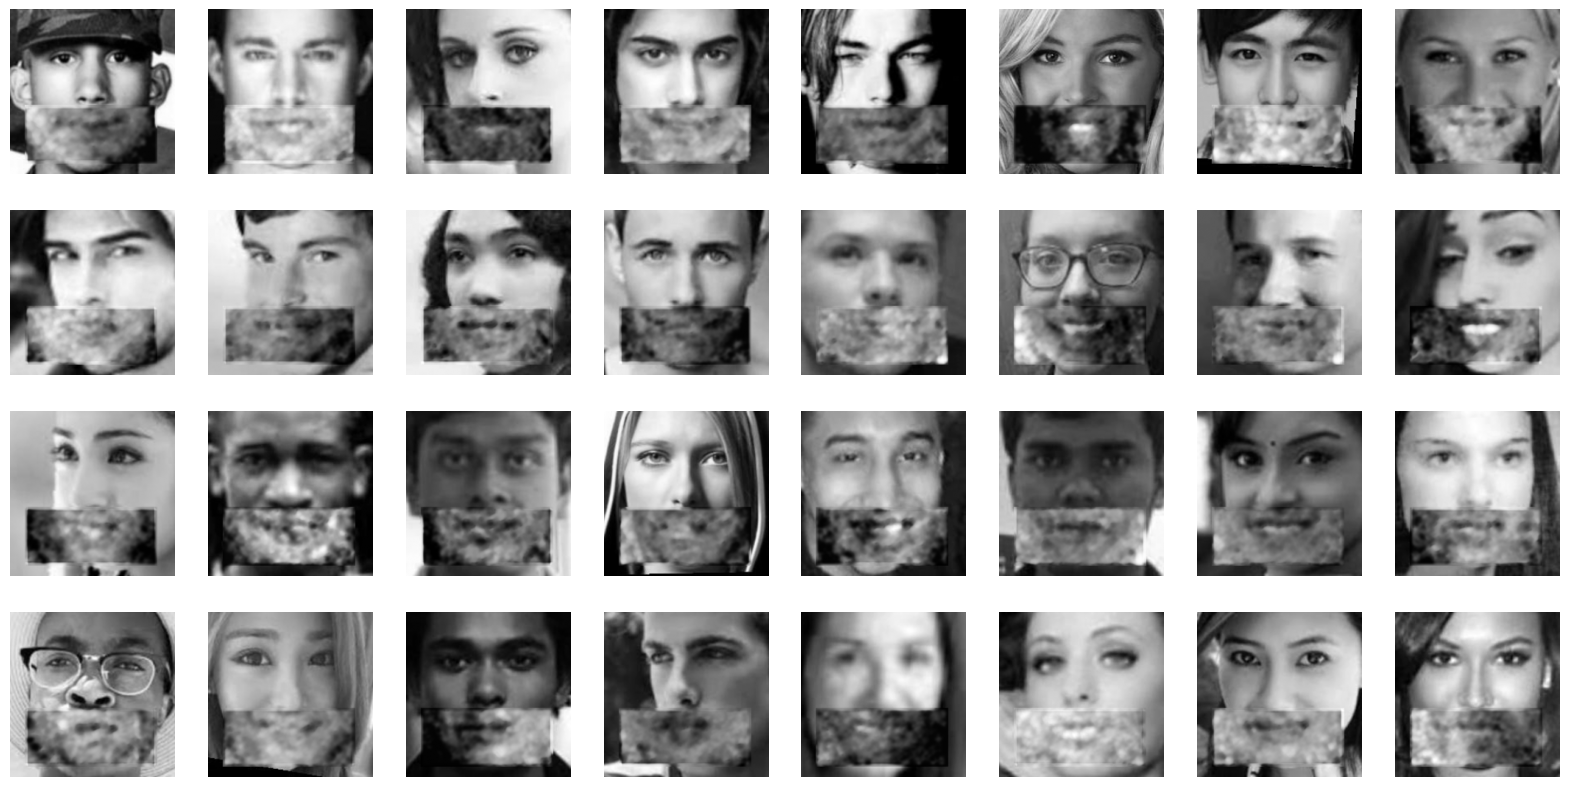

In [ ]:
setup_seed(42)

noise_dimension = param['noise_dimension']
noise_type = param['noise_type']
input_var = param['input_var']

z_demo = image_test_covered_tensor[:32,:,:,:].clone()
x_demo = image_test_tensor[:32,:,:,:].clone()


Noise_fake = sample_noise(z_demo.shape[0], noise_dimension, noise_type, input_var = input_var).to(device)

model_x_k1.eval()
with torch.no_grad():
    z_demo_temp = model_x_k1.get_full_image(z_demo.to(device), Noise_fake.to(device))


# Plot the images
plot_images_from_tensor(z_demo_temp.cpu().detach())
# plot_images_from_tensor(output.cpu().detach())

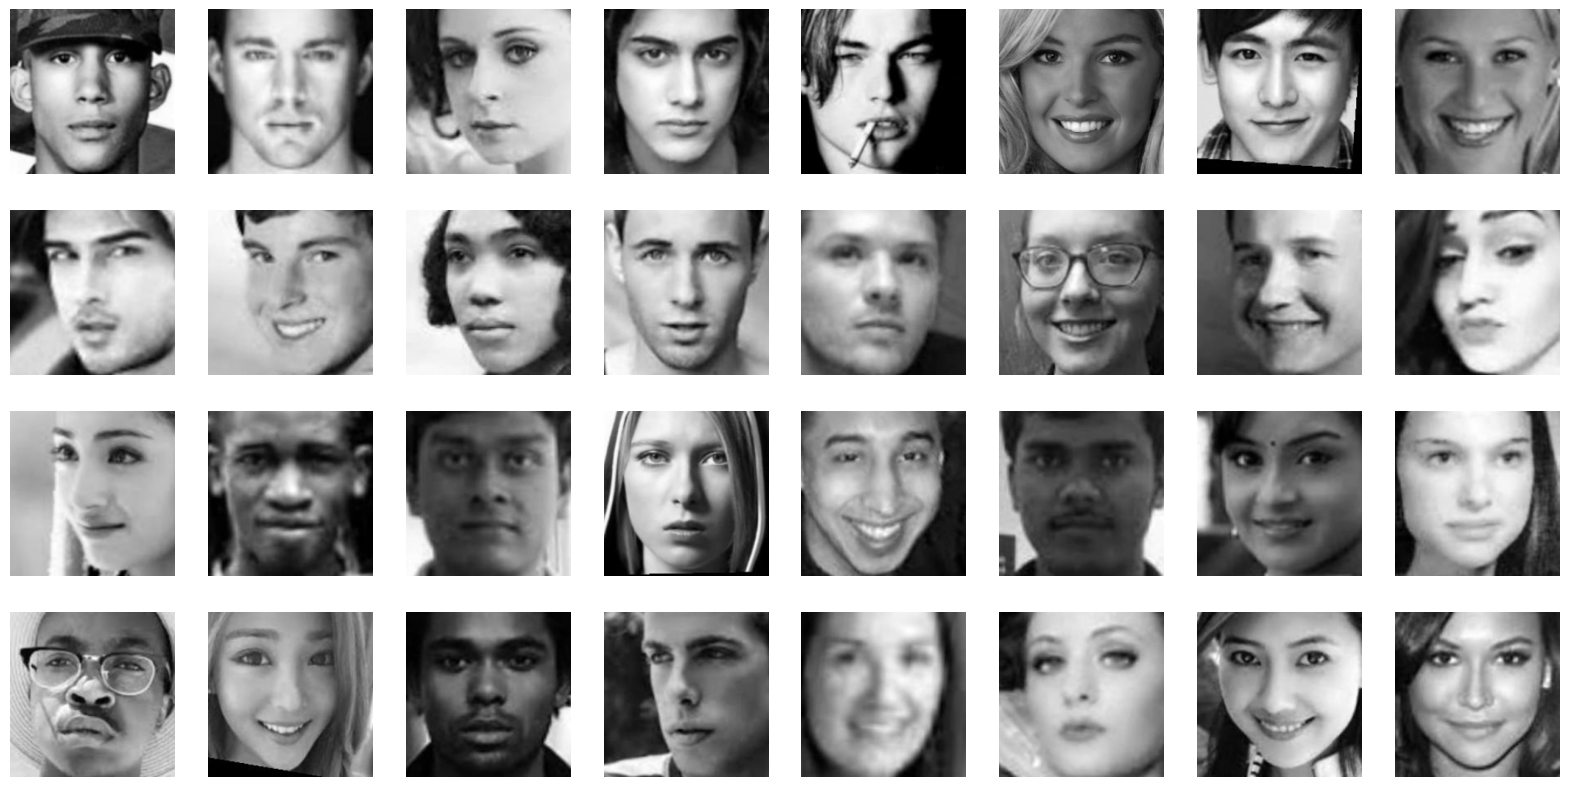

In [ ]:
# Plot the images
plot_images_from_tensor(x_demo.cpu().detach())

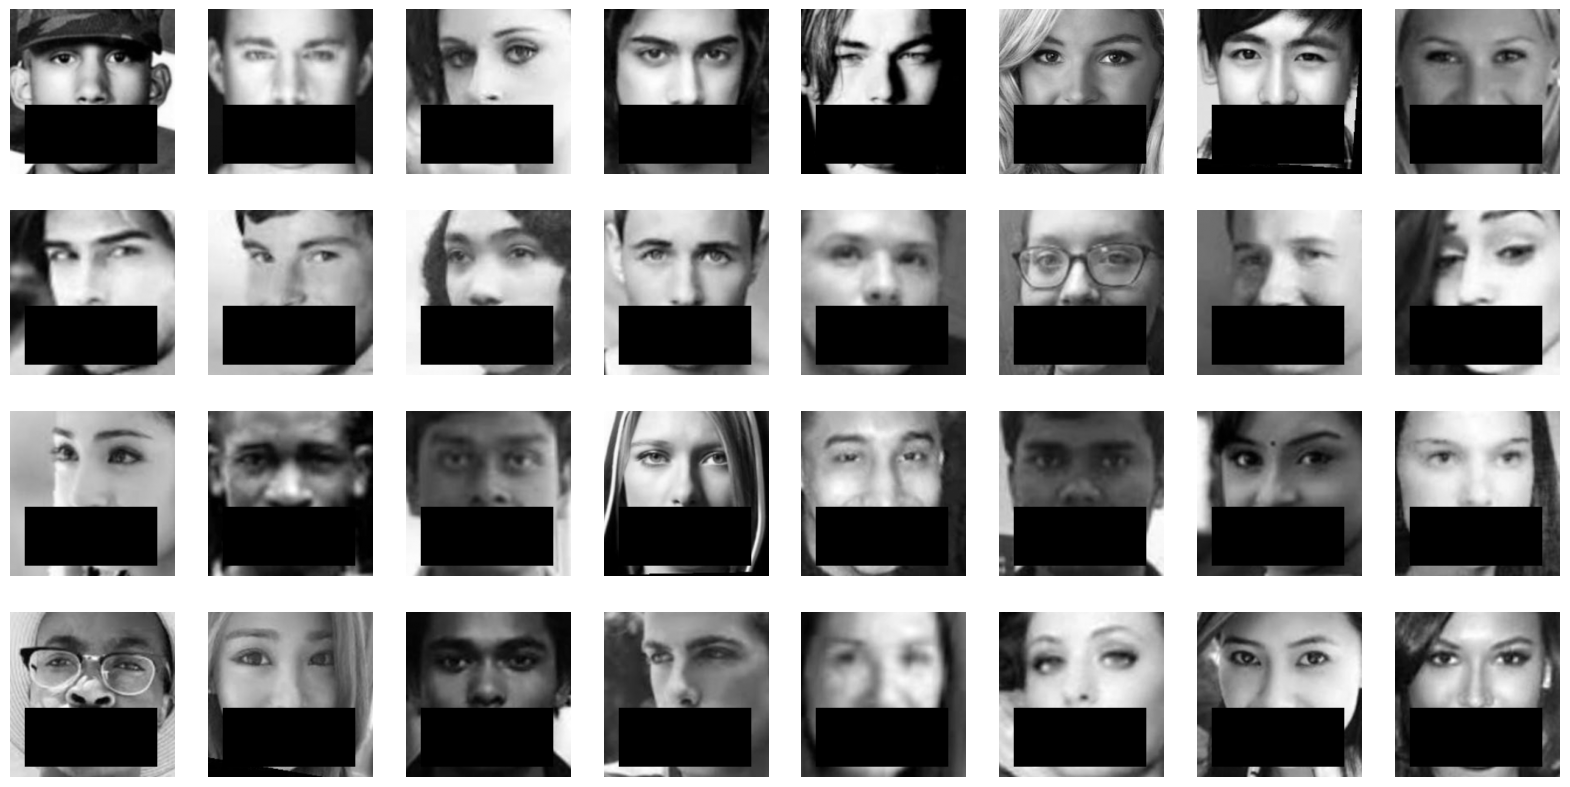

In [ ]:
# Plot the images
plot_images_from_tensor(z_demo.cpu().detach())

In [ ]:
z_demo = image_train_covered_tensor[:32,:,:,:].clone()
x_demo = image_train_tensor[:32,:,:,:].clone()


Noise_fake = sample_noise(z_demo.shape[0], noise_dimension, noise_type, input_var = input_var).to(device)

model_x_k2.eval()
with torch.no_grad():
    z_demo_temp = model_x_k2.get_full_image(z_demo.to(device), Noise_fake.to(device))


# Plot the images
plot_images_from_tensor(z_demo_temp.cpu().detach())

In [ ]:
# Plot the images
plot_images_from_tensor(x_demo.cpu().detach())

In [ ]:
# Plot the images
plot_images_from_tensor(z_demo.cpu().detach())

In [ ]:
x_train, x_test, z_train, z_test = image_train_tensor, image_test_tensor, image_train_covered_tensor, image_test_covered_tensor

In [ ]:
y_train, y_test = torch.tensor(ages_train_array, dtype=torch.float32), torch.tensor(ages_test_array, dtype=torch.float32)

# Find p_val G Kernel, rademacher rv, X Full

In [ ]:

def get_p_value_stat_g(boot_num, M, n, gen_x_all_torch, gen_y_all_torch, x_torch, y_torch, z_torch, boor_rv_type="gaussian", sigma_w=1.0, sigma_u=1.0):

    d_y = y_torch.shape[1]
    d_x = x_torch.shape[1]

    w_mx = torch.exp(-get_distance_matrix(z_torch, z_torch, 2) ** 2 / sigma_w)
    u_mx_1 = torch.exp(-get_distance_matrix(x_torch, x_torch, 2) ** 2 / sigma_u)
    u_mx_2 = torch.exp(-get_distance_matrix(gen_x_all_torch[:,0,:], x_torch, 2) ** 2 / sigma_u)
    for i in range(1, M):
        u_mx_2 = u_mx_2 + torch.exp(-get_distance_matrix(gen_x_all_torch[:,i,:], x_torch, 2) ** 2 / sigma_u)
    u_mx_2 = u_mx_2 / M

    u_mx_3 = u_mx_2.T
    u_mx_4 = torch.exp(-get_distance_matrix(gen_x_all_torch[:,0,:], gen_x_all_torch[:,0,:], 2) ** 2 / sigma_u)
    for i in range(1, M):
        u_mx_4 = u_mx_4 + torch.exp(-get_distance_matrix(gen_x_all_torch[:,i,:], gen_x_all_torch[:,i,:], 2) ** 2 / sigma_u)
    u_mx_4 = u_mx_4 / M

    u_mx = u_mx_1 - u_mx_2 - u_mx_3 + u_mx_4
    v_mx_temp = (gen_y_all_torch - y_torch)
    v_mx = torch.matmul(v_mx_temp, v_mx_temp.T)
    FF_mx = u_mx * v_mx * w_mx * (1 - torch.eye(n).to(device))

    stat = 1 / (n - 1) * torch.sum(FF_mx).item()

    boottemp = np.array([])
    if boor_rv_type == "rademacher":
        eboot = torch.sign(torch.randn(n, boot_num)).to(device)
    elif boor_rv_type == "gaussian":
        eboot = torch.randn(n, boot_num).to(device)
    for bb in range(boot_num):
        random_mx = torch.matmul(eboot[:, bb].reshape(-1, 1), eboot[:, bb].reshape(-1, 1).T)
        bootmatrix = FF_mx * random_mx
        stat_boot = 1 / (n - 1) * torch.sum(bootmatrix).item()
        boottemp = np.append(boottemp, stat_boot)
    return stat, boottemp

boot_num = 1000
M = 100

stat_list = np.zeros(2)
boot_stat_list = np.zeros((2, boot_num))

# x_temp = torch.cat((x_train.clone(), x_test.clone()), dim=1).reshape(2000, -1).to(device)
# x_temp = torch.cat((x_train.clone(), x_test.clone()), dim=1)
# x_temp = x_temp[:,:,hight_1:hight_2, width_1:width_2]
# x_temp = x_temp.reshape(2000, -1).to(device)
# z_temp = torch.cat((z_train.clone(), z_test.clone()), dim=1).reshape(2000, -1).to(device)

# w_mx = get_distance_matrix(z_temp, z_temp, 2) ** 2
# sigma_w = torch.median(w_mx).item() * 2

# u_mx = get_distance_matrix(x_temp, x_temp, 2) ** 2
# sigma_u = torch.median(u_mx).item() * 2

# print(sigma_w)
# print(sigma_u)

x_dims = 1*224*224
y_dims = 1
z_dim = 1*224*224
test_size = 1000
set_seed = param['set_seed']

gen_x_all = torch.zeros(test_size, M, x_dims)
gen_y_all = torch.zeros(test_size, y_dims)
z_all = torch.zeros(test_size, z_dim)
x_all = torch.zeros(test_size, x_dims)
y_all = torch.zeros(test_size, y_dims)

# gen_y_all = y_pred_test
# y_all= y_true_test

test_data_zxy = Data.TensorDataset(z_test, x_test, y_test)
test_loader_zxy = Data.DataLoader(dataset=test_data_zxy, batch_size=1, shuffle=False)

setup_seed(set_seed)

model_x_k1.eval()
model_y_k1.eval()
with torch.no_grad():
    for i, (batch_z, batch_x, batch_y) in tqdm(enumerate(test_loader_zxy)):
        # batch_x = batch_x[:,:,hight_1:hight_2, width_1:width_2]
        batch_z = batch_z.to(device)
        z_all[i, :] = batch_z.reshape(1, -1)
        y_all[i, :] = batch_y.reshape(1, -1)

        y_pred = model_y_k1(batch_z.repeat(1, 3, 1, 1).to(device))
        gen_y_all[i, :] = y_pred.reshape(1, -1)

        repeat_dims = (M, 1, 1, 1)
        Z_real_repeat = batch_z.repeat(*repeat_dims).to(device)

        Noise_fake = sample_noise(Z_real_repeat.shape[0], noise_dimension, noise_type, input_var = input_var).to(device)

        output = model_x_k2.get_full_image(Z_real_repeat.to(device), Noise_fake.to(device))
        # output = output[:, :, hight_1:hight_2, width_1:width_2]
        output = output.reshape(M, 1, output.shape[1], output.shape[2], output.shape[3]).swapaxes(0, 1)

        X_fake = output.reshape(M, -1).to(device)


        gen_x_all[i, :, :] = X_fake
        x_all[i, :] = batch_x.reshape(1, -1)

print(gen_x_all.shape)
print(gen_y_all.shape)
print(z_all.shape)
print(x_all.shape)
print(y_all.shape)


w_mx = get_distance_matrix(z_all, z_all, 2) ** 2
sigma_w = torch.median(w_mx).item() * 2

u_mx = get_distance_matrix(x_all, x_all, 2) ** 2
sigma_u = torch.median(u_mx).item() * 2

print(sigma_w)
print(sigma_u)

cur_stat, cur_boot_temp = get_p_value_stat_g(boot_num, M, test_size, gen_x_all.to(device), gen_y_all.to(device),
                    x_all.to(device), y_all.to(device), z_all.to(device), 'rademacher', sigma_w, sigma_u)

stat_list[0] = cur_stat
boot_stat_list[0, :] = cur_boot_temp

x_dims = 1*224*224
y_dims = 1
z_dim = 1*224*224
test_size = 1000

gen_x_all = torch.zeros(test_size, M, x_dims)
gen_y_all = torch.zeros(test_size, y_dims)
z_all = torch.zeros(test_size, z_dim)
x_all = torch.zeros(test_size, x_dims)
y_all = torch.zeros(test_size, y_dims)

# gen_y_all = y_pred_train
# y_all= y_true_train

train_data_zxy = Data.TensorDataset(z_train, x_train, y_train)
train_loader_zxy = Data.DataLoader(dataset=train_data_zxy, batch_size=1, shuffle=False)

setup_seed(set_seed)

model_x_k2.eval()
model_y_k2.eval()
with torch.no_grad():
    for i, (batch_z, batch_x, batch_y) in tqdm(enumerate(train_loader_zxy)):
        # batch_x = batch_x[:,:,hight_1:hight_2, width_1:width_2]
        batch_z = batch_z.to(device)
        z_all[i, :] = batch_z.reshape(1, -1)
        y_all[i, :] = batch_y.reshape(1, -1)

        y_pred = model_y_k2(batch_z.repeat(1, 3, 1, 1).to(device))
        gen_y_all[i, :] = y_pred.reshape(1, -1)

        repeat_dims = (M, 1, 1, 1)
        Z_real_repeat = batch_z.repeat(*repeat_dims).to(device)

        Noise_fake = sample_noise(Z_real_repeat.shape[0], noise_dimension, noise_type, input_var = input_var).to(device)

        output = model_x_k2.get_full_image(Z_real_repeat.to(device), Noise_fake.to(device))
        # output = output[:, :, hight_1:hight_2, width_1:width_2]
        output = output.reshape(M, 1, output.shape[1], output.shape[2], output.shape[3]).swapaxes(0, 1)

        X_fake = output.reshape(M, -1).to(device)


        gen_x_all[i, :, :] = X_fake
        x_all[i, :] = batch_x.reshape(1, -1)

print(gen_x_all.shape)
print(gen_y_all.shape)
print(z_all.shape)
print(x_all.shape)
print(y_all.shape)


w_mx = get_distance_matrix(z_all, z_all, 2) ** 2
sigma_w = torch.median(w_mx).item() * 2

u_mx = get_distance_matrix(x_all, x_all, 2) ** 2
sigma_u = torch.median(u_mx).item() * 2

print(sigma_w)
print(sigma_u)

cur_stat, cur_boot_temp = get_p_value_stat_g(boot_num, M, test_size, gen_x_all.to(device), gen_y_all.to(device),
                    x_all.to(device), y_all.to(device), z_all.to(device), 'rademacher', sigma_w, sigma_u)

stat_list[1] = cur_stat
boot_stat_list[1, :] = cur_boot_temp

p_val = np.mean( np.mean(stat_list) < np.mean(boot_stat_list, axis=0) )
print(p_val)

p_val_1, p_val_2 = np.mean( stat_list[1] < boot_stat_list[1, :] ), np.mean( stat_list[0] < boot_stat_list[0, :] )
print(p_val_1)
print(p_val_2)

1000it [01:49,  9.13it/s]


torch.Size([1000, 100, 50176])
torch.Size([1000, 1])
torch.Size([1000, 50176])
torch.Size([1000, 50176])
torch.Size([1000, 1])
5765.8408203125
7831.2001953125


1000it [01:49,  9.13it/s]


torch.Size([1000, 100, 50176])
torch.Size([1000, 1])
torch.Size([1000, 50176])
torch.Size([1000, 50176])
torch.Size([1000, 1])
5705.31787109375
7771.48095703125
0.051
0.25
0.036


# Find p_val G Kernel, rademacher rv, X Sub

In [ ]:

def get_p_value_stat_g(boot_num, M, n, gen_x_all_torch, gen_y_all_torch, x_torch, y_torch, z_torch, boor_rv_type="gaussian", sigma_w=1.0, sigma_u=1.0):

    d_y = y_torch.shape[1]
    d_x = x_torch.shape[1]

    w_mx = torch.exp(-get_distance_matrix(z_torch, z_torch, 2) ** 2 / sigma_w)
    u_mx_1 = torch.exp(-get_distance_matrix(x_torch, x_torch, 2) ** 2 / sigma_u)
    u_mx_2 = torch.exp(-get_distance_matrix(gen_x_all_torch[:,0,:], x_torch, 2) ** 2 / sigma_u)
    for i in range(1, M):
        u_mx_2 = u_mx_2 + torch.exp(-get_distance_matrix(gen_x_all_torch[:,i,:], x_torch, 2) ** 2 / sigma_u)
    u_mx_2 = u_mx_2 / M

    u_mx_3 = u_mx_2.T
    u_mx_4 = torch.exp(-get_distance_matrix(gen_x_all_torch[:,0,:], gen_x_all_torch[:,0,:], 2) ** 2 / sigma_u)
    for i in range(1, M):
        u_mx_4 = u_mx_4 + torch.exp(-get_distance_matrix(gen_x_all_torch[:,i,:], gen_x_all_torch[:,i,:], 2) ** 2 / sigma_u)
    u_mx_4 = u_mx_4 / M

    u_mx = u_mx_1 - u_mx_2 - u_mx_3 + u_mx_4
    v_mx_temp = (gen_y_all_torch - y_torch)
    v_mx = torch.matmul(v_mx_temp, v_mx_temp.T)
    FF_mx = u_mx * v_mx * w_mx * (1 - torch.eye(n).to(device))

    stat = 1 / (n - 1) * torch.sum(FF_mx).item()

    boottemp = np.array([])
    if boor_rv_type == "rademacher":
        eboot = torch.sign(torch.randn(n, boot_num)).to(device)
    elif boor_rv_type == "gaussian":
        eboot = torch.randn(n, boot_num).to(device)
    for bb in range(boot_num):
        random_mx = torch.matmul(eboot[:, bb].reshape(-1, 1), eboot[:, bb].reshape(-1, 1).T)
        bootmatrix = FF_mx * random_mx
        stat_boot = 1 / (n - 1) * torch.sum(bootmatrix).item()
        boottemp = np.append(boottemp, stat_boot)
    return stat, boottemp

boot_num = 1000
M = 100

stat_list = np.zeros(2)
boot_stat_list = np.zeros((2, boot_num))

# x_temp = torch.cat((x_train.clone(), x_test.clone()), dim=1).reshape(2000, -1).to(device)
# x_temp = torch.cat((x_train.clone(), x_test.clone()), dim=1)
# x_temp = x_temp[:,:,hight_1:hight_2, width_1:width_2]
# x_temp = x_temp.reshape(2000, -1).to(device)
# z_temp = torch.cat((z_train.clone(), z_test.clone()), dim=1).reshape(2000, -1).to(device)

# w_mx = get_distance_matrix(z_temp, z_temp, 2) ** 2
# sigma_w = torch.median(w_mx).item() * 2

# u_mx = get_distance_matrix(x_temp, x_temp, 2) ** 2
# sigma_u = torch.median(u_mx).item() * 2

# print(sigma_w)
# print(sigma_u)

x_dims = 1*(hight_2-hight_1)*(width_2-width_1)
y_dims = 1
z_dim = 1*224*224
test_size = 1000
set_seed = param['set_seed']

gen_x_all = torch.zeros(test_size, M, x_dims)
gen_y_all = torch.zeros(test_size, y_dims)
z_all = torch.zeros(test_size, z_dim)
x_all = torch.zeros(test_size, x_dims)
y_all = torch.zeros(test_size, y_dims)

# gen_y_all = y_pred_test
# y_all= y_true_test

test_data_zxy = Data.TensorDataset(z_test, x_test, y_test)
test_loader_zxy = Data.DataLoader(dataset=test_data_zxy, batch_size=1, shuffle=False)

setup_seed(set_seed)

model_x_k1.eval()
model_y_k1.eval()
with torch.no_grad():
    for i, (batch_z, batch_x, batch_y) in tqdm(enumerate(test_loader_zxy)):
        batch_x = batch_x[:,:,hight_1:hight_2, width_1:width_2]
        batch_z = batch_z.to(device)
        z_all[i, :] = batch_z.reshape(1, -1)
        y_all[i, :] = batch_y.reshape(1, -1)

        y_pred = model_y_k1(batch_z.repeat(1, 3, 1, 1).to(device))
        gen_y_all[i, :] = y_pred.reshape(1, -1)

        repeat_dims = (M, 1, 1, 1)
        Z_real_repeat = batch_z.repeat(*repeat_dims).to(device)

        Noise_fake = sample_noise(Z_real_repeat.shape[0], noise_dimension, noise_type, input_var = input_var).to(device)

        output = model_x_k2.get_full_image(Z_real_repeat.to(device), Noise_fake.to(device))
        output = output[:, :, hight_1:hight_2, width_1:width_2]
        output = output.reshape(M, 1, output.shape[1], output.shape[2], output.shape[3]).swapaxes(0, 1)

        X_fake = output.reshape(M, -1).to(device)


        gen_x_all[i, :, :] = X_fake
        x_all[i, :] = batch_x.reshape(1, -1)

print(gen_x_all.shape)
print(gen_y_all.shape)
print(z_all.shape)
print(x_all.shape)
print(y_all.shape)

standardise = False

if standardise:
    # gen_x_all = (gen_x_all - torch.mean(gen_x_all, dim=0, keepdim=True)) / torch.std(gen_x_all, dim=0, keepdim=True)
    gen_y_all = (gen_y_all - 20) / (59-20)
    # x_all = (x_all - torch.mean(x_all, dim=0, keepdim=True)) / torch.std(x_all, dim=0, keepdim=True)
    y_all = (y_all - 20) / (59-20)
    # z_all = (z_all - torch.mean(z_all, dim=0, keepdim=True)) / torch.std(z_all, dim=0, keepdim=True)

w_mx = get_distance_matrix(z_all, z_all, 2) ** 2
sigma_w = torch.median(w_mx).item() * 2

u_mx = get_distance_matrix(x_all, x_all, 2) ** 2
sigma_u = torch.median(u_mx).item() * 2

print(sigma_w)
print(sigma_u)

cur_stat, cur_boot_temp = get_p_value_stat_g(boot_num, M, test_size, gen_x_all.to(device), gen_y_all.to(device),
                    x_all.to(device), y_all.to(device), z_all.to(device), 'rademacher', sigma_w, sigma_u)

stat_list[0] = cur_stat
boot_stat_list[0, :] = cur_boot_temp

x_dims = 1*(hight_2-hight_1)*(width_2-width_1)
y_dims = 1
z_dim = 1*224*224
test_size = 1000

gen_x_all = torch.zeros(test_size, M, x_dims)
gen_y_all = torch.zeros(test_size, y_dims)
z_all = torch.zeros(test_size, z_dim)
x_all = torch.zeros(test_size, x_dims)
y_all = torch.zeros(test_size, y_dims)

# gen_y_all = y_pred_train
# y_all= y_true_train

train_data_zxy = Data.TensorDataset(z_train, x_train, y_train)
train_loader_zxy = Data.DataLoader(dataset=train_data_zxy, batch_size=1, shuffle=False)

setup_seed(set_seed)

model_x_k2.eval()
model_y_k2.eval()
with torch.no_grad():
    for i, (batch_z, batch_x, batch_y) in tqdm(enumerate(train_loader_zxy)):
        batch_x = batch_x[:,:,hight_1:hight_2, width_1:width_2]
        batch_z = batch_z.to(device)
        z_all[i, :] = batch_z.reshape(1, -1)
        y_all[i, :] = batch_y.reshape(1, -1)

        y_pred = model_y_k2(batch_z.repeat(1, 3, 1, 1).to(device))
        gen_y_all[i, :] = y_pred.reshape(1, -1)

        repeat_dims = (M, 1, 1, 1)
        Z_real_repeat = batch_z.repeat(*repeat_dims).to(device)

        Noise_fake = sample_noise(Z_real_repeat.shape[0], noise_dimension, noise_type, input_var = input_var).to(device)

        output = model_x_k2.get_full_image(Z_real_repeat.to(device), Noise_fake.to(device))
        output = output[:, :, hight_1:hight_2, width_1:width_2]
        output = output.reshape(M, 1, output.shape[1], output.shape[2], output.shape[3]).swapaxes(0, 1)

        X_fake = output.reshape(M, -1).to(device)


        gen_x_all[i, :, :] = X_fake
        x_all[i, :] = batch_x.reshape(1, -1)

print(gen_x_all.shape)
print(gen_y_all.shape)
print(z_all.shape)
print(x_all.shape)
print(y_all.shape)

standardise = False

if standardise:
    # gen_x_all = (gen_x_all - torch.mean(gen_x_all, dim=0, keepdim=True)) / torch.std(gen_x_all, dim=0, keepdim=True)
    gen_y_all = (gen_y_all - 20) / (59-20)
    # x_all = (x_all - torch.mean(x_all, dim=0, keepdim=True)) / torch.std(x_all, dim=0, keepdim=True)
    y_all = (y_all - 20) / (59-20)
    # z_all = (z_all - torch.mean(z_all, dim=0, keepdim=True)) / torch.std(z_all, dim=0, keepdim=True)

w_mx = get_distance_matrix(z_all, z_all, 2) ** 2
sigma_w = torch.median(w_mx).item() * 2

u_mx = get_distance_matrix(x_all, x_all, 2) ** 2
sigma_u = torch.median(u_mx).item() * 2

print(sigma_w)
print(sigma_u)

cur_stat, cur_boot_temp = get_p_value_stat_g(boot_num, M, test_size, gen_x_all.to(device), gen_y_all.to(device),
                    x_all.to(device), y_all.to(device), z_all.to(device), 'rademacher', sigma_w, sigma_u)

stat_list[1] = cur_stat
boot_stat_list[1, :] = cur_boot_temp

p_val = np.mean( np.mean(stat_list) < np.mean(boot_stat_list, axis=0) )
print(p_val)

p_val_1, p_val_2 = np.mean( stat_list[1] < boot_stat_list[1, :] ), np.mean( stat_list[0] < boot_stat_list[0, :] )
print(p_val_1)
print(p_val_2)

1000it [01:46,  9.39it/s]


torch.Size([1000, 100, 14400])
torch.Size([1000, 1])
torch.Size([1000, 50176])
torch.Size([1000, 14400])
torch.Size([1000, 1])
5765.8408203125
1986.6075439453125


1000it [01:46,  9.39it/s]


torch.Size([1000, 100, 14400])
torch.Size([1000, 1])
torch.Size([1000, 50176])
torch.Size([1000, 14400])
torch.Size([1000, 1])
5705.31787109375
1992.1309814453125
0.061
0.312
0.038


# Find p_val L Kernel, rademacher rv, X Full

In [ ]:
boot_num = 1000
M = 100

stat_list = np.zeros(2)
boot_stat_list = np.zeros((2, boot_num))

# x_temp = torch.cat((x_train.clone(), x_test.clone()), dim=1).reshape(2000, -1).to(device)
# x_temp = torch.cat((x_train.clone(), x_test.clone()), dim=1)
# x_temp = x_temp[:,:,hight_1:hight_2, width_1:width_2]
# x_temp = x_temp.reshape(2000, -1).to(device)
# z_temp = torch.cat((z_train.clone(), z_test.clone()), dim=1).reshape(2000, -1).to(device)

# w_mx = get_distance_matrix(z_temp, z_temp, 2) ** 2
# sigma_w = torch.median(w_mx).item() * 2

# u_mx = get_distance_matrix(x_temp, x_temp, 2) ** 2
# sigma_u = torch.median(u_mx).item() * 2

# print(sigma_w)
# print(sigma_u)

x_dims = 1*224*224
y_dims = 1
z_dim = 1*224*224
test_size = 1000
set_seed = param['set_seed']

gen_x_all = torch.zeros(test_size, M, x_dims)
gen_y_all = torch.zeros(test_size, y_dims)
z_all = torch.zeros(test_size, z_dim)
x_all = torch.zeros(test_size, x_dims)
y_all = torch.zeros(test_size, y_dims)

# gen_y_all = y_pred_test
# y_all= y_true_test

test_data_zxy = Data.TensorDataset(z_test, x_test, y_test)
test_loader_zxy = Data.DataLoader(dataset=test_data_zxy, batch_size=1, shuffle=False)

setup_seed(set_seed)

model_x_k1.eval()
model_y_k1.eval()
with torch.no_grad():
    for i, (batch_z, batch_x, batch_y) in tqdm(enumerate(test_loader_zxy)):
        # batch_x = batch_x[:,:,hight_1:hight_2, width_1:width_2]
        batch_z = batch_z.to(device)
        z_all[i, :] = batch_z.reshape(1, -1)
        y_all[i, :] = batch_y.reshape(1, -1)

        y_pred = model_y_k1(batch_z.repeat(1, 3, 1, 1).to(device))
        gen_y_all[i, :] = y_pred.reshape(1, -1)

        repeat_dims = (M, 1, 1, 1)
        Z_real_repeat = batch_z.repeat(*repeat_dims).to(device)

        Noise_fake = sample_noise(Z_real_repeat.shape[0], noise_dimension, noise_type, input_var = input_var).to(device)

        output = model_x_k2.get_full_image(Z_real_repeat.to(device), Noise_fake.to(device))
        # output = output[:, :, hight_1:hight_2, width_1:width_2]
        output = output.reshape(M, 1, output.shape[1], output.shape[2], output.shape[3]).swapaxes(0, 1)

        X_fake = output.reshape(M, -1).to(device)


        gen_x_all[i, :, :] = X_fake
        x_all[i, :] = batch_x.reshape(1, -1)

print(gen_x_all.shape)
print(gen_y_all.shape)
print(z_all.shape)
print(x_all.shape)
print(y_all.shape)


w_mx = get_distance_matrix(z_all, z_all)
sigma_w = torch.median(w_mx).item()

u_mx = get_distance_matrix(x_all, x_all)
sigma_u = torch.median(u_mx).item()

print(sigma_w)
print(sigma_u)

cur_stat, cur_boot_temp = get_p_value_stat(boot_num, M, test_size, gen_x_all.to(device), gen_y_all.to(device),
                    x_all.to(device), y_all.to(device), z_all.to(device), 'rademacher', sigma_w, sigma_u)

stat_list[0] = cur_stat
boot_stat_list[0, :] = cur_boot_temp

x_dims = 1*224*224
y_dims = 1
z_dim = 1*224*224
test_size = 1000

gen_x_all = torch.zeros(test_size, M, x_dims)
gen_y_all = torch.zeros(test_size, y_dims)
z_all = torch.zeros(test_size, z_dim)
x_all = torch.zeros(test_size, x_dims)
y_all = torch.zeros(test_size, y_dims)

# gen_y_all = y_pred_train
# y_all= y_true_train

train_data_zxy = Data.TensorDataset(z_train, x_train, y_train)
train_loader_zxy = Data.DataLoader(dataset=train_data_zxy, batch_size=1, shuffle=False)

setup_seed(set_seed)

model_x_k2.eval()
model_y_k2.eval()
with torch.no_grad():
    for i, (batch_z, batch_x, batch_y) in tqdm(enumerate(train_loader_zxy)):
        # batch_x = batch_x[:,:,hight_1:hight_2, width_1:width_2]
        batch_z = batch_z.to(device)
        z_all[i, :] = batch_z.reshape(1, -1)
        y_all[i, :] = batch_y.reshape(1, -1)

        y_pred = model_y_k2(batch_z.repeat(1, 3, 1, 1).to(device))
        gen_y_all[i, :] = y_pred.reshape(1, -1)

        repeat_dims = (M, 1, 1, 1)
        Z_real_repeat = batch_z.repeat(*repeat_dims).to(device)

        Noise_fake = sample_noise(Z_real_repeat.shape[0], noise_dimension, noise_type, input_var = input_var).to(device)

        output = model_x_k2.get_full_image(Z_real_repeat.to(device), Noise_fake.to(device))
        # output = output[:, :, hight_1:hight_2, width_1:width_2]
        output = output.reshape(M, 1, output.shape[1], output.shape[2], output.shape[3]).swapaxes(0, 1)

        X_fake = output.reshape(M, -1).to(device)


        gen_x_all[i, :, :] = X_fake
        x_all[i, :] = batch_x.reshape(1, -1)

print(gen_x_all.shape)
print(gen_y_all.shape)
print(z_all.shape)
print(x_all.shape)
print(y_all.shape)


w_mx = get_distance_matrix(z_all, z_all)
sigma_w = torch.median(w_mx).item()

u_mx = get_distance_matrix(x_all, x_all)
sigma_u = torch.median(u_mx).item()

print(sigma_w)
print(sigma_u)

cur_stat, cur_boot_temp = get_p_value_stat(boot_num, M, test_size, gen_x_all.to(device), gen_y_all.to(device),
                    x_all.to(device), y_all.to(device), z_all.to(device), 'rademacher', sigma_w, sigma_u)

stat_list[1] = cur_stat
boot_stat_list[1, :] = cur_boot_temp

p_val = np.mean( np.mean(stat_list) < np.mean(boot_stat_list, axis=0) )
print(p_val)

p_val_1, p_val_2 = np.mean( stat_list[1] < boot_stat_list[1, :] ), np.mean( stat_list[0] < boot_stat_list[0, :] )
print(p_val_1)
print(p_val_2)

1000it [01:49,  9.14it/s]


torch.Size([1000, 100, 50176])
torch.Size([1000, 1])
torch.Size([1000, 50176])
torch.Size([1000, 50176])
torch.Size([1000, 1])
8149.6123046875
11263.685546875


1000it [01:49,  9.14it/s]


torch.Size([1000, 100, 50176])
torch.Size([1000, 1])
torch.Size([1000, 50176])
torch.Size([1000, 50176])
torch.Size([1000, 1])
8088.23876953125
11201.845703125
0.043
0.3
0.027


# Find p_val L Kernel, rademacher rv, X Sub

In [ ]:
boot_num = 1000
M = 100

stat_list = np.zeros(2)
boot_stat_list = np.zeros((2, boot_num))

# x_temp = torch.cat((x_train.clone(), x_test.clone()), dim=1).reshape(2000, -1).to(device)
# x_temp = torch.cat((x_train.clone(), x_test.clone()), dim=1)
# x_temp = x_temp[:,:,hight_1:hight_2, width_1:width_2]
# x_temp = x_temp.reshape(2000, -1).to(device)
# z_temp = torch.cat((z_train.clone(), z_test.clone()), dim=1).reshape(2000, -1).to(device)

# w_mx = get_distance_matrix(z_temp, z_temp, 2) ** 2
# sigma_w = torch.median(w_mx).item() * 2

# u_mx = get_distance_matrix(x_temp, x_temp, 2) ** 2
# sigma_u = torch.median(u_mx).item() * 2

# print(sigma_w)
# print(sigma_u)

x_dims = 1*(hight_2-hight_1)*(width_2-width_1)
y_dims = 1
z_dim = 1*224*224
test_size = 1000
set_seed = param['set_seed']

gen_x_all = torch.zeros(test_size, M, x_dims)
gen_y_all = torch.zeros(test_size, y_dims)
z_all = torch.zeros(test_size, z_dim)
x_all = torch.zeros(test_size, x_dims)
y_all = torch.zeros(test_size, y_dims)

# gen_y_all = y_pred_test
# y_all= y_true_test

test_data_zxy = Data.TensorDataset(z_test, x_test, y_test)
test_loader_zxy = Data.DataLoader(dataset=test_data_zxy, batch_size=1, shuffle=False)

setup_seed(set_seed)

model_x_k1.eval()
model_y_k1.eval()
with torch.no_grad():
    for i, (batch_z, batch_x, batch_y) in tqdm(enumerate(test_loader_zxy)):
        batch_x = batch_x[:,:,hight_1:hight_2, width_1:width_2]
        batch_z = batch_z.to(device)
        z_all[i, :] = batch_z.reshape(1, -1)
        y_all[i, :] = batch_y.reshape(1, -1)

        y_pred = model_y_k1(batch_z.repeat(1, 3, 1, 1).to(device))
        gen_y_all[i, :] = y_pred.reshape(1, -1)

        repeat_dims = (M, 1, 1, 1)
        Z_real_repeat = batch_z.repeat(*repeat_dims).to(device)

        Noise_fake = sample_noise(Z_real_repeat.shape[0], noise_dimension, noise_type, input_var = input_var).to(device)

        output = model_x_k2.get_full_image(Z_real_repeat.to(device), Noise_fake.to(device))
        output = output[:, :, hight_1:hight_2, width_1:width_2]
        output = output.reshape(M, 1, output.shape[1], output.shape[2], output.shape[3]).swapaxes(0, 1)

        X_fake = output.reshape(M, -1).to(device)


        gen_x_all[i, :, :] = X_fake
        x_all[i, :] = batch_x.reshape(1, -1)

print(gen_x_all.shape)
print(gen_y_all.shape)
print(z_all.shape)
print(x_all.shape)
print(y_all.shape)


w_mx = get_distance_matrix(z_all, z_all)
sigma_w = torch.median(w_mx).item()

u_mx = get_distance_matrix(x_all, x_all)
sigma_u = torch.median(u_mx).item()

print(sigma_w)
print(sigma_u)

cur_stat, cur_boot_temp = get_p_value_stat(boot_num, M, test_size, gen_x_all.to(device), gen_y_all.to(device),
                    x_all.to(device), y_all.to(device), z_all.to(device), 'rademacher', sigma_w, sigma_u)

stat_list[0] = cur_stat
boot_stat_list[0, :] = cur_boot_temp

x_dims = 1*(hight_2-hight_1)*(width_2-width_1)
y_dims = 1
z_dim = 1*224*224
test_size = 1000

gen_x_all = torch.zeros(test_size, M, x_dims)
gen_y_all = torch.zeros(test_size, y_dims)
z_all = torch.zeros(test_size, z_dim)
x_all = torch.zeros(test_size, x_dims)
y_all = torch.zeros(test_size, y_dims)

# gen_y_all = y_pred_train
# y_all= y_true_train

train_data_zxy = Data.TensorDataset(z_train, x_train, y_train)
train_loader_zxy = Data.DataLoader(dataset=train_data_zxy, batch_size=1, shuffle=False)

setup_seed(set_seed)

model_x_k2.eval()
model_y_k2.eval()
with torch.no_grad():
    for i, (batch_z, batch_x, batch_y) in tqdm(enumerate(train_loader_zxy)):
        batch_x = batch_x[:,:,hight_1:hight_2, width_1:width_2]
        batch_z = batch_z.to(device)
        z_all[i, :] = batch_z.reshape(1, -1)
        y_all[i, :] = batch_y.reshape(1, -1)

        y_pred = model_y_k2(batch_z.repeat(1, 3, 1, 1).to(device))
        gen_y_all[i, :] = y_pred.reshape(1, -1)

        repeat_dims = (M, 1, 1, 1)
        Z_real_repeat = batch_z.repeat(*repeat_dims).to(device)

        Noise_fake = sample_noise(Z_real_repeat.shape[0], noise_dimension, noise_type, input_var = input_var).to(device)

        output = model_x_k2.get_full_image(Z_real_repeat.to(device), Noise_fake.to(device))
        output = output[:, :, hight_1:hight_2, width_1:width_2]
        output = output.reshape(M, 1, output.shape[1], output.shape[2], output.shape[3]).swapaxes(0, 1)

        X_fake = output.reshape(M, -1).to(device)


        gen_x_all[i, :, :] = X_fake
        x_all[i, :] = batch_x.reshape(1, -1)

print(gen_x_all.shape)
print(gen_y_all.shape)
print(z_all.shape)
print(x_all.shape)
print(y_all.shape)


w_mx = get_distance_matrix(z_all, z_all)
sigma_w = torch.median(w_mx).item()

u_mx = get_distance_matrix(x_all, x_all)
sigma_u = torch.median(u_mx).item()

print(sigma_w)
print(sigma_u)

cur_stat, cur_boot_temp = get_p_value_stat(boot_num, M, test_size, gen_x_all.to(device), gen_y_all.to(device),
                    x_all.to(device), y_all.to(device), z_all.to(device), 'rademacher', sigma_w, sigma_u)

stat_list[1] = cur_stat
boot_stat_list[1, :] = cur_boot_temp

p_val = np.mean( np.mean(stat_list) < np.mean(boot_stat_list, axis=0) )
print(p_val)

p_val_1, p_val_2 = np.mean( stat_list[1] < boot_stat_list[1, :] ), np.mean( stat_list[0] < boot_stat_list[0, :] )
print(p_val_1)
print(p_val_2)

1000it [01:46,  9.39it/s]


torch.Size([1000, 100, 14400])
torch.Size([1000, 1])
torch.Size([1000, 50176])
torch.Size([1000, 14400])
torch.Size([1000, 1])
8149.6123046875
3093.267333984375


1000it [01:46,  9.40it/s]


torch.Size([1000, 100, 14400])
torch.Size([1000, 1])
torch.Size([1000, 50176])
torch.Size([1000, 14400])
torch.Size([1000, 1])
8088.23876953125
3095.598876953125
0.042
0.326
0.025
